# G3 Searching with circuits

To implement Grover search, we need to give circuit-friendly constructions of the oracle and diffusion operators; arbitrary matrices are hard to build! To help us, we introduce an extra qubit called the auxiliary qubit. The original  qubits are called the query register:

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

![](https://codebook.xanadu.ai/pics/grover-iter-1.svg)

### Codercise G.3.1. 
Define the oracle operator  using the MultiControlledX gate from PennyLane.

Tip. MultiControlledX(control_wires, wires, control_values) has a specified set of control_wires, a single target wire given by wires, and a string of control values, e.g., control_values = "1011" rather than a list of bits [1,0,1,1].

In [ ]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register+aux
dev = qml.device('default.qubit', wires=all_wires)

def oracle(combo):
    """Implement an oracle using a multi-controlled X gate.
    
    Args:
        combo (list): A list of bits representing the secret combination.
    """
    combo_str = ''.join(str(j) for j in combo)
    ##################
    # YOUR CODE HERE #
    ##################
    pass # APPLY MULTI-CONTROLLED X
    qml.MultiControlledX(control_wires=query_register, wires=aux,control_values=combo_str)



We can use a similar approach for the diffusion operator . This operator flips the (orthogonal complement of) the uniform superposition  rather than a computational basis state, but we can work in the computational basis simply by using a Hadamard transform. The circuit for performing diffusion is then:

![](https://codebook.xanadu.ai/pics/diffusion.svg)

### Codercise G.3.2. 
Implement the diffusion operator in terms of the multi-controlled . Note that query_register, aux and all_wires refer to the wires in the query register, the auxiliary qubit, and all wires respectively. The Hadamard transform has been defined for you.

In [ ]:
def hadamard_transform(my_wires):
    """Apply the Hadamard transform on a given set of wires.
    
    Args:
        my_wires (list[int]): A list of wires on which the Hadamard transform will act.
    """
    for wire in my_wires:
        qml.Hadamard(wires=wire)

def diffusion():
    """Implement the diffusion operator using the Hadamard transform and 
    multi-controlled X."""

    ##################
    # YOUR CODE HERE #
    ##################
    pass
    hadamard_transform(query_register)
    qml.MultiControlledX(control_wires=query_register, wires=aux,control_values="0"*len(query_register))
    hadamard_transform(query_register)



Finally, we can assemble these into an honest-to-goodness circuit which initializes the state and applies the Grover operator once:

![](https://codebook.xanadu.ai/pics/grover-iter-2.svg)

###Codercise G.3.3. 
In the code below, create a circuit which prepares the uniform superposition in the query register, places the auxiliary qubit in the  state, and applies a single Grover iteration using MultiControlledX. We will plot the output for combo = [0, 0, 0, 0, 0]. Note that the subcircuits oracle(combo), hadamard_transform(my_wires) and diffusion() are provided for you and do not need to be reimplemented.

In [ ]:
@qml.qnode(dev)
def grover_circuit(combo):
    """Apply the MultiControlledX Grover operator and return probabilities on 
    query register.
    
    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[float]: Measurement outcome probabilities.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    # PREPARE QUERY AND AUXILIARY SYSTEM
    # APPLY GROVER ITERATION
    qml.PauliX(wires=aux)
    hadamard_transform(all_wires)
    oracle(combo)
    diffusion()

    return qml.probs(wires=query_register)


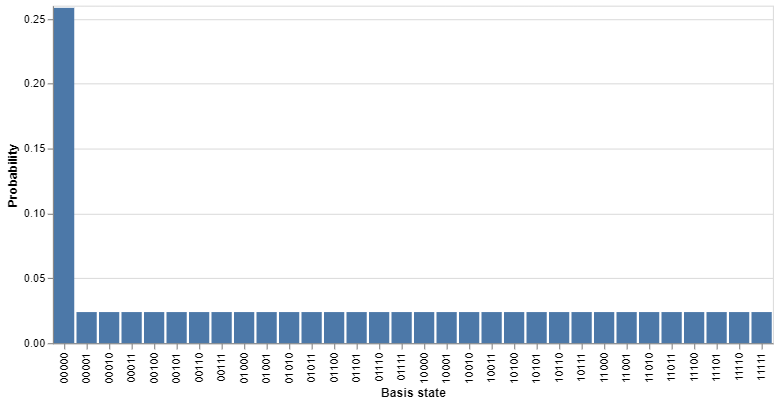